
Processing: image_01.png


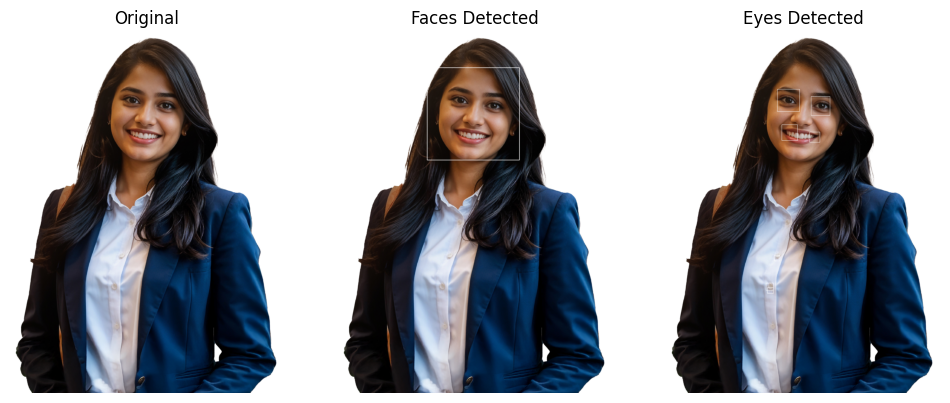


Processing: image_02.png


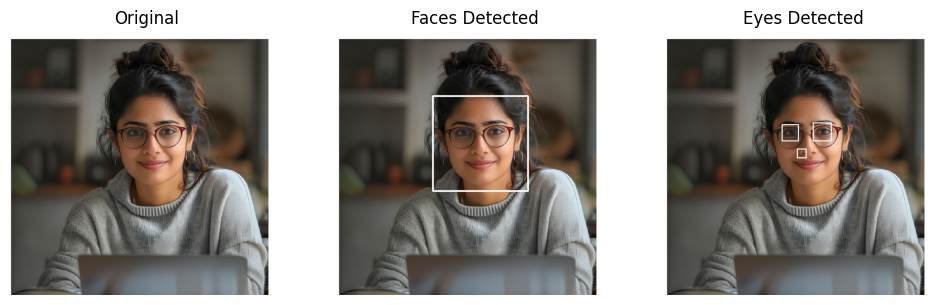


Processing Group Image Separately for Clear View...


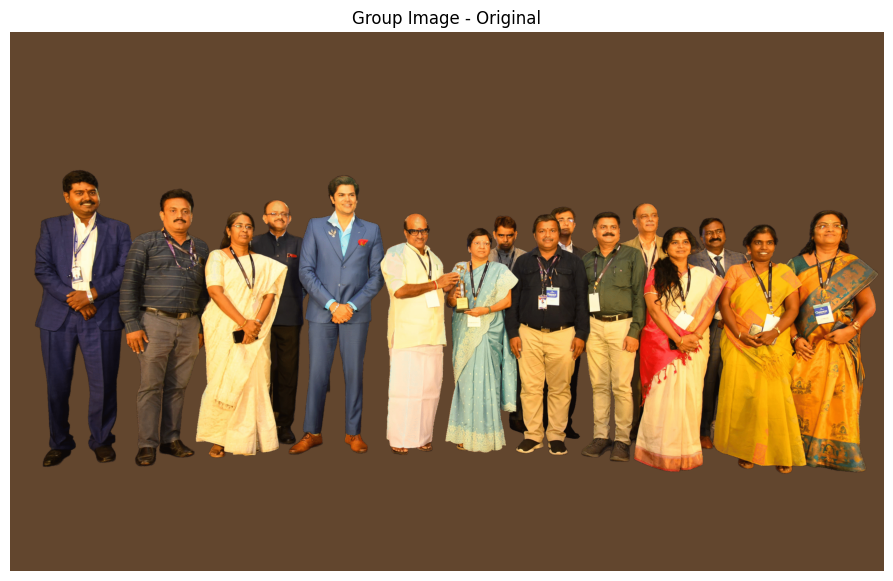

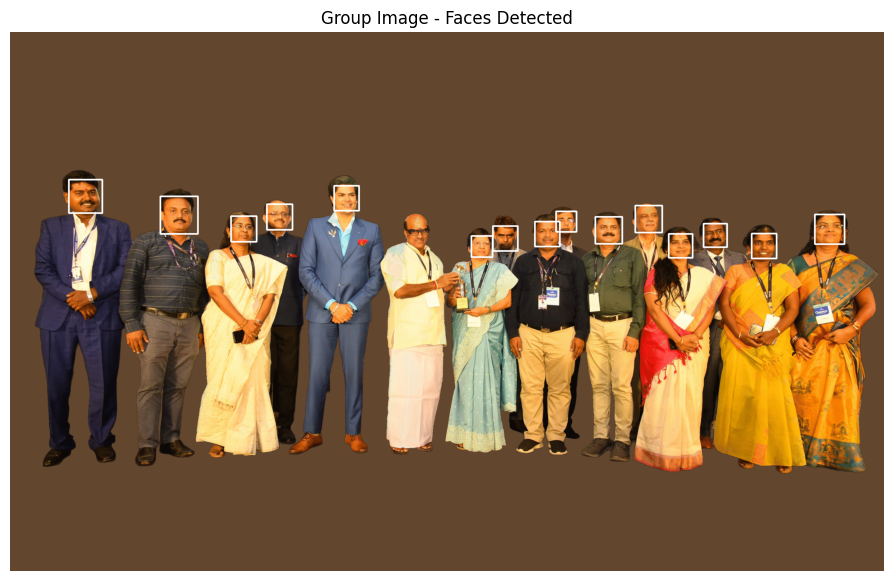

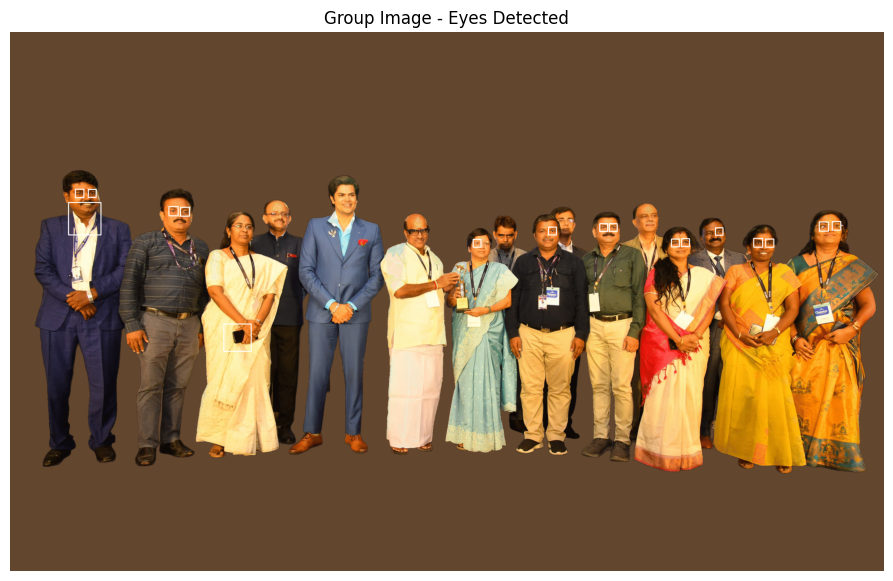


All images processed successfully!

Starting Real-Time Face Detection...
Webcam connected successfully. Press ESC to exit.

Real-Time Face Detection Ended.


In [1]:
# FACE & EYE DETECTION FOR MULTIPLE IMAGES + REAL-TIME WEBCAM
# Developed by: Hari priya M
# Register Number: 212224240047

import cv2
import matplotlib.pyplot as plt

# LOAD HAAR CASCADES
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                     'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                    'haarcascade_eye.xml')

# DETECTION FUNCTIONS
def detect_face(image):
    img_copy = image.copy()
    gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
    return img_copy

def detect_eyes(image):
    img_copy = image.copy()
    gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray_img, 1.1, 3)
    for (x, y, w, h) in eyes:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 2)
    return img_copy

# IMAGE LIST
single_images = ["image_01.png", "image_02.png"]
group_image   = "image_03.png"

# PROCESS SINGLE IMAGES SIDE-BY-SIDE
for image_name in single_images:
    print(f"\nProcessing: {image_name}")

    img = cv2.imread(image_name)
    face_img = detect_face(img)
    eye_img  = detect_eyes(img)

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Faces Detected")
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Eyes Detected")
    plt.imshow(cv2.cvtColor(eye_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# PROCESS GROUP IMAGE SEPARATELY (FOR CLARITY)
print("\nProcessing Group Image Separately for Clear View...")

img_group = cv2.imread(group_image)
face_group = detect_face(img_group)
eye_group  = detect_eyes(img_group)

plt.figure(figsize=(14, 7))
plt.title("Group Image - Original")
plt.imshow(cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.figure(figsize=(14, 7))
plt.title("Group Image - Faces Detected")
plt.imshow(cv2.cvtColor(face_group, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.figure(figsize=(14, 7))
plt.title("Group Image - Eyes Detected")
plt.imshow(cv2.cvtColor(eye_group, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print("\nAll images processed successfully!")

# REAL-TIME FACE DETECTION USING WEBCAM
print("\nStarting Real-Time Face Detection...")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

if not cap.isOpened():
    print("ERROR: Webcam not detected!")
    exit()
else:
    print("Webcam connected successfully. Press ESC to exit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("ERROR: Failed to capture frame!")
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 2)
        cv2.putText(frame, "Face", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (255, 255, 255), 2)

    cv2.imshow("Real-Time Face Detection (ESC to Quit)", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()
print("\nReal-Time Face Detection Ended.")
